## Toyota car price prediction

![toyota symbol.jpg](<attachment:toyota symbol.jpg>)

###### By: Team InnoMinds  (Vivek Gautam, Nikhil Kumar Sharma, Sanganbasava Math, Saroj Pandit)

### Introduction:
The dataset provided here consist of Toyota UK Car- related attributes, which is collected from Kaggle (https://rb.gy/owtkqf).
The 'toyota.csv' dataset contains various features of Toyota cars, likely including attributes such as model, year, mileage, engine size, fuel type, and other specifications. This information can be used to analyze and predict the price(£) of Toyota cars based on these features.
In this analysis, We have done a basic EDA of car features and we have selected best features for predicting the price(£) of the car.

### Problem statement:

The primary purpose of using this dataset is to predict used car price based on features provided by user. By leveraging the attributes provided in the dataset, we aim to build a predictive model that can estimate the price(£) of Toyota cars.
- We will use different Regression models like (Linear regression model, Multiple Linear Regression model, Decision Tree, Random forest resression) for the price prediction.

In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Importing warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing dataset
df = pd.read_csv(r'toyota.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [ ]:
# Number of rows and columns
df.shape

(6738, 9)

In [ ]:
# Displaying basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


1) In our dataset there are 9 columns, out of which 3 are categorical and rest of are numerical columns
2) Total number of rows are 6738

In [ ]:
# Check for missing values
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [ ]:
# removing duplicates
df.drop_duplicates(inplace=True)

In [ ]:
# Summary statistics
df.describe(include='all')

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
count,6699,6699.000000,6699.000000,6699,6699.000000,6699,6699.000000,6699.000000,6699.000000
unique,18,NaN,NaN,4,NaN,4,NaN,NaN,NaN
top,Yaris,NaN,NaN,Manual,NaN,Petrol,NaN,NaN,NaN
freq,2117,NaN,NaN,3793,NaN,4058,NaN,NaN,NaN
mean,NaN,2016.742797,12529.799074,NaN,22889.588745,NaN,94.549933,63.078728,1.471996
std,NaN,2.205271,6358.562625,NaN,19109.288501,NaN,73.942649,15.861037,0.435624
min,NaN,1998.000000,850.000000,NaN,2.000000,NaN,0.000000,2.800000,0.000000
25%,NaN,2016.000000,8266.500000,NaN,9488.500000,NaN,0.000000,55.400000,1.000000
50%,NaN,2017.000000,10798.000000,NaN,18571.000000,NaN,135.000000,62.800000,1.500000
75%,NaN,2018.000000,14995.000000,NaN,31059.500000,NaN,145.000000,70.600000,1.800000


- Some Insights
1) There are 18 unique car models in the dataset.
2) Top model which is occured most number of time is 'Yaris'
3) Average price of the car is:- 12522.391066 pound, Max price is:- 59995 pound, Minimum price is:- 850 pound
4) In the middle 50 percent of the dataset the cars have the avg price of 10795 pound.

In [ ]:
# One-Hot Encode the categorical variables
df_encoded = pd.get_dummies(df, columns=['model', 'transmission', 'fuelType'], drop_first=True)
df_encoded.head(3)

,year,price,mileage,tax,mpg,engineSize,model_ Avensis,model_ Aygo,model_ C-HR,model_ Camry,...,model_ Urban Cruiser,model_ Verso,model_ Verso-S,model_ Yaris,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2016,16000,24089,265,36.2,2.0,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
1,2017,15995,18615,145,36.2,2.0,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,2015,13998,27469,265,36.2,2.0,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

df=pd.read_csv('/content/toyota.csv')
df


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0
...,...,...,...,...,...,...,...,...,...
6733,IQ,2011,5500,Automatic,30000,Petrol,20,58.9,1.0
6734,Urban Cruiser,2011,4985,Manual,36154,Petrol,125,50.4,1.3
6735,Urban Cruiser,2012,4995,Manual,46000,Diesel,125,57.6,1.4
6736,Urban Cruiser,2011,3995,Manual,60700,Petrol,125,50.4,1.3


# Exploratory Data Analysis

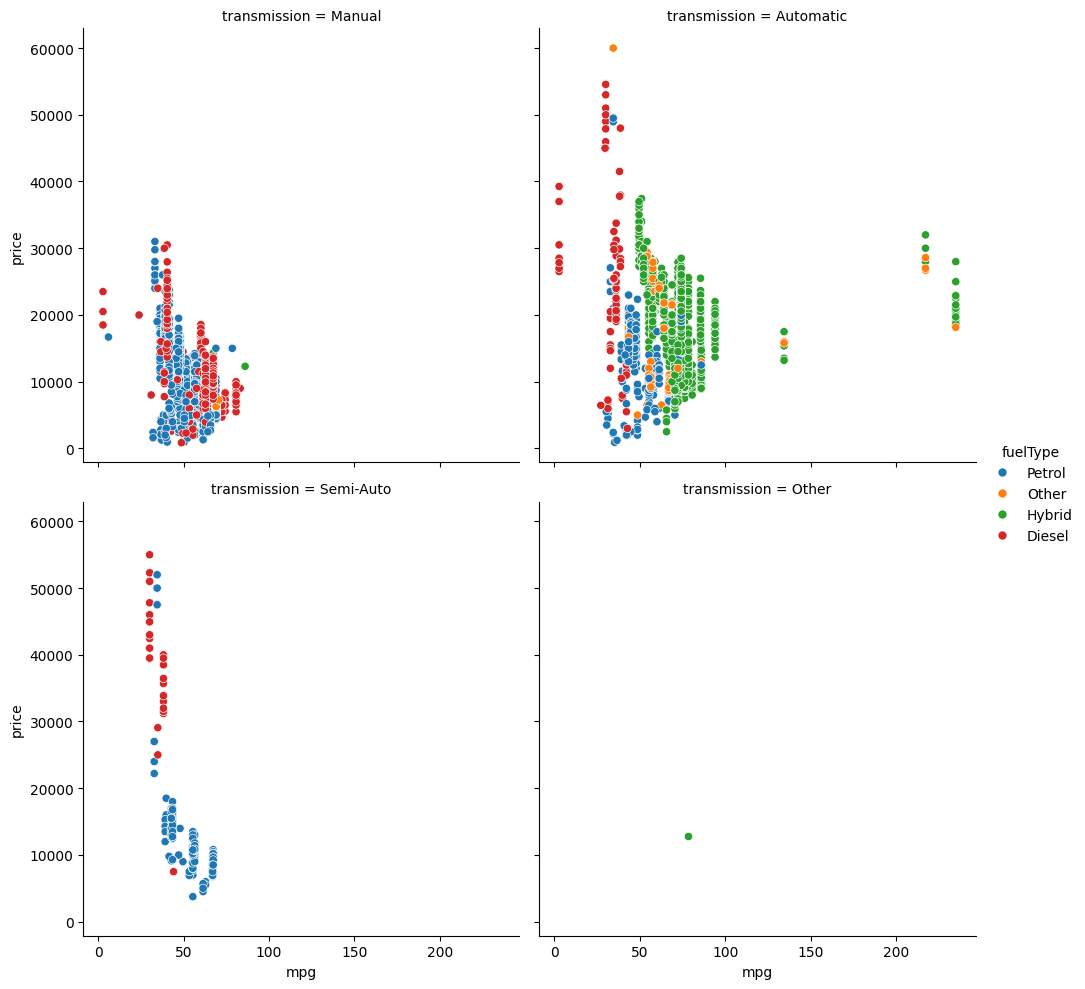

In [ ]:
#scatter plot of every transmission vs price
#using figure level seaborn function,ie relplot
sns.relplot(data=df,x='mpg',y='price',hue='fuelType',kind='scatter',col='transmission',col_wrap=2)



1.In semi automatic cars,We only see diesel and petrol ,most of costly cars are diesel.
2.In 2nd diagram lot of hybrid cars are automatic,and they have more mpg than petrol and diesel.
3.Expensive cars have very low mpg,so ineffiecient.









<Figure size 1000x500 with 0 Axes>

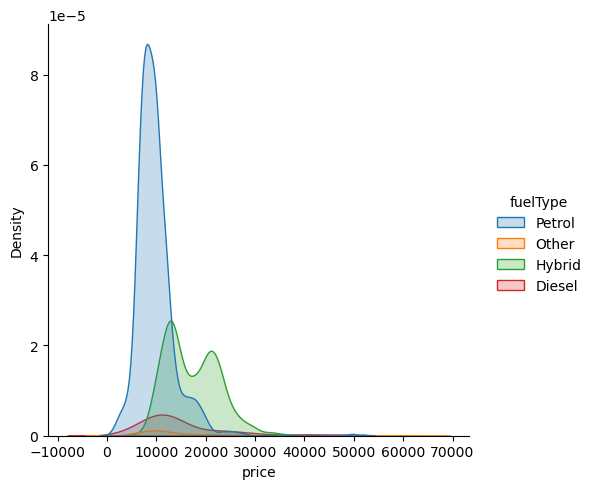

In [ ]:
# price and density graph for fuelType
plt.figure(figsize=(10,5))
sns.displot(data=df,x='price',kind='kde',hue='fuelType',fill = all)
plt.show()

1) There is less variation in price among petrol cars,mode is around 8k price
2) We see hybrid have more proportion of cars in costlier version(price > 12000 ponds) than petrol &diesel

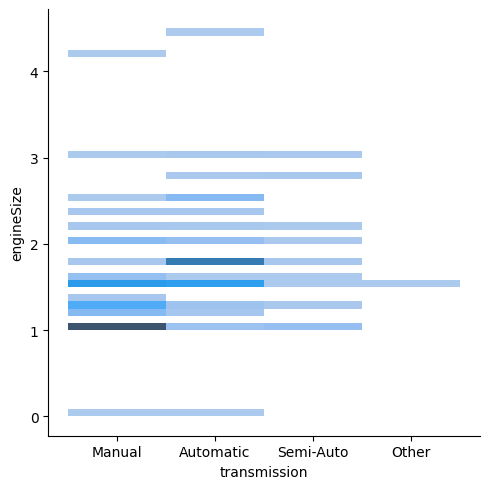

In [ ]:
#2d histogram of transmission vs engine size
sns.displot(data=df, x='transmission', y='engineSize',kind='hist')
plt.show()

Above we see lot of manuals cars have 1 litre engine size
and automatic have around 1.8 ltrs.
(more darker represents more frequency)

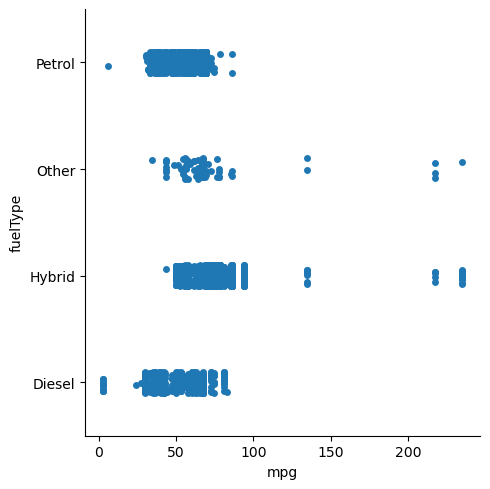

In [ ]:
#graph of mpg vs fuel TYPE
sns.catplot(data=df, x='mpg', y='fuelType')
plt.show()

By above graph we see that,if we want very high mpg,we need to avoid diesel and petrol AND rely on hybrid and others.

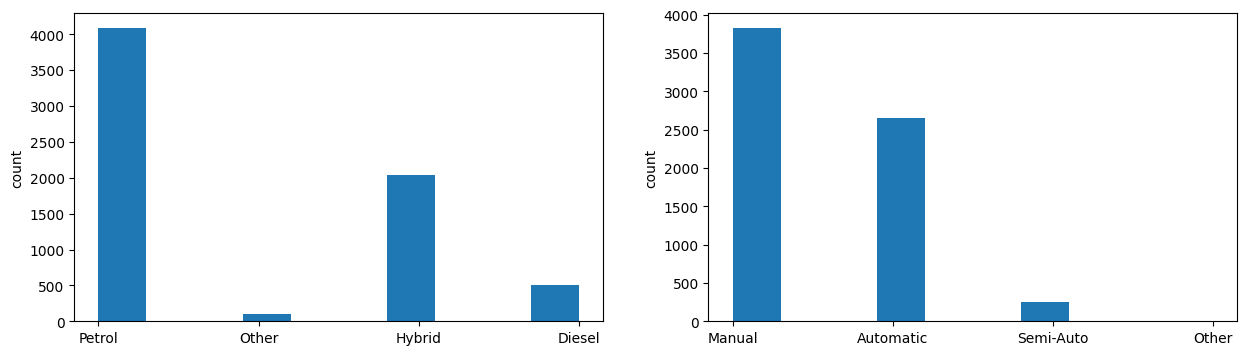

In [ ]:
#HISTOGRAM OF FUEL TYPE AND TRANSMISSION
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.hist(df['fuelType'])
plt.ylabel('count')

plt.subplot(1,2,2)
plt.hist(df['transmission'])
plt.ylabel('count')
plt.show()


1) Petrol cars are sold more,almost twice of hybrid
2) We can see count of differerent transmission vehicles most of cars sold are manuals and automatic

<Axes: xlabel='fuelType', ylabel='price'>

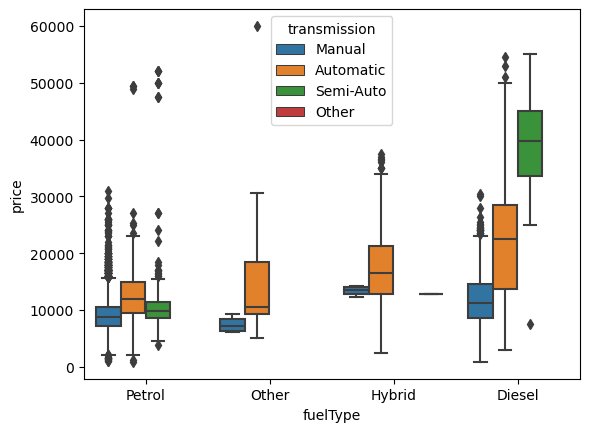

In [ ]:
#Distribution of price in each (fuel type,transmission) tuple
sns.boxplot(data=df,x='fuelType',y='price',hue='transmission')

Diesel semi automatic costliest,and manuals are the cheapest in every fuel type and diesel are more costly than other fuel type cars,petrols cars have the most outliers in price

<Axes: xlabel='transmission', ylabel='price'>

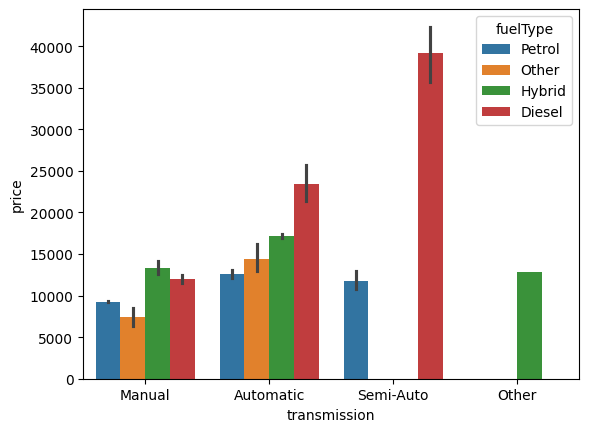

In [ ]:
#Mean of price in each (fuel type,transmission) combination
sns.barplot(data=df,x='transmission',y='price',estimator=np.mean,hue='fuelType')

y axis is mean price.

1. Diesel semi automatic are the most costliest
2. Automatic cars more costly than manual,in every fuel Type




<Axes: xlabel='fuelType', ylabel='price'>

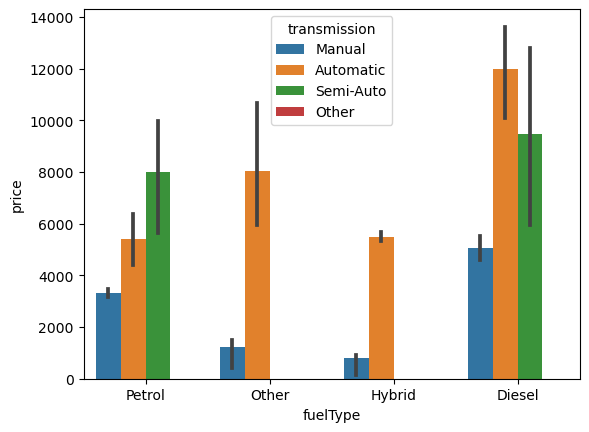

In [ ]:
#Standard devation of price in each (fuel type,transmission) tuple
sns.barplot(data=df,x='fuelType',y='price',estimator=np.std,hue='transmission')
#y axis is standard deviation in price

Manuals have the least price variation!
hybrid manuals have least price variation,most price variation seen in automatic diesel cars

<Axes: xlabel='fuelType', ylabel='price'>

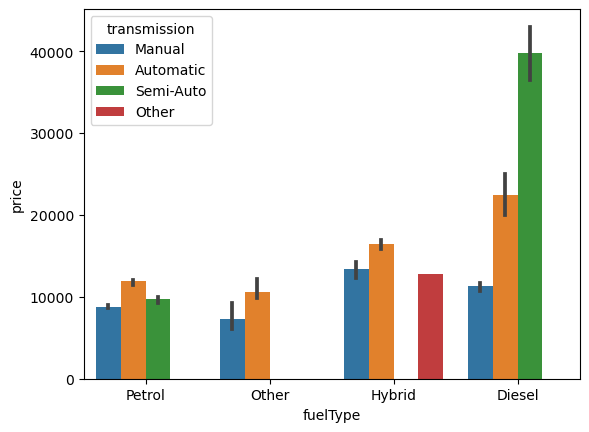

In [ ]:
#Median of price in each (fuel type,transmission) tuple
sns.barplot(data=df,x='fuelType',y='price',estimator=np.median,hue='transmission')

Price and Mileage Distribution

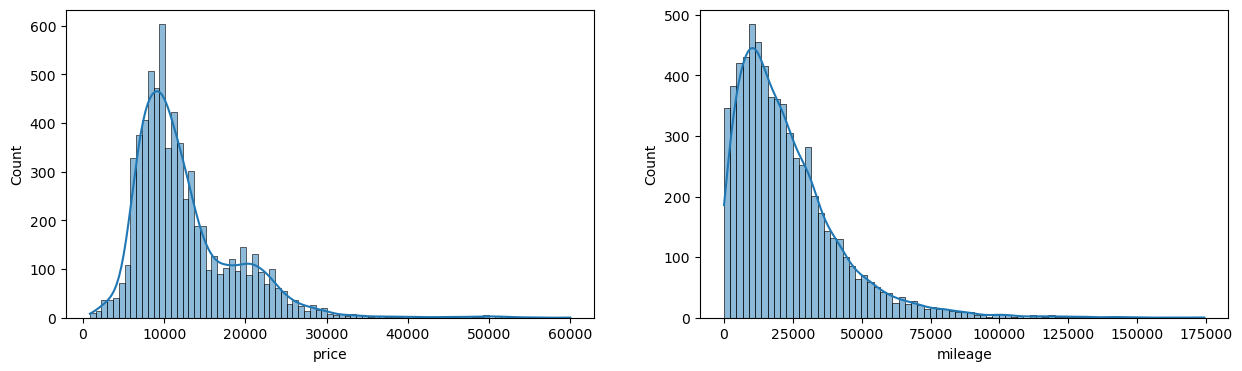

In [ ]:

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.histplot(df_encoded['price'],kde=True)

plt.subplot(1,2,2)
sns.histplot(df_encoded['mileage'],kde=1)
plt.show()

# Applying Regression Models:

<Axes: xlabel='mileage', ylabel='price'>

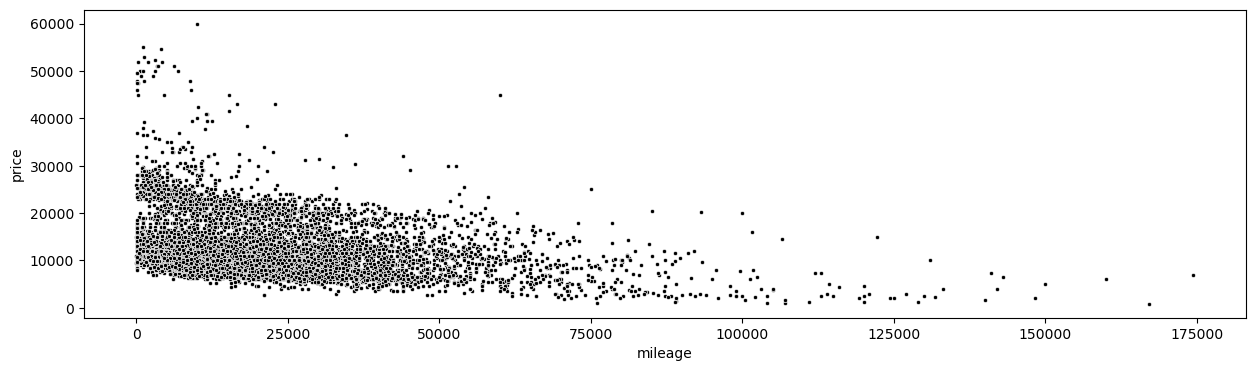

In [ ]:
# scatter plot of 'mileage' vs 'price'
x = df_encoded['mileage']
y = df_encoded['price']

plt.figure(figsize=(15,4))
sns.scatterplot(x = df_encoded['mileage'], y = df_encoded['price'], alpha = 1, marker = '.',color = 'black')

Here we can clearly see that applying linear regression with one feature variable is not a good idea beacuse from the above graph it is clear that 'price' and 'milegae' does not have a linear relationship.

In [ ]:
#correlation matrix to understand relationships between variables
correlation_matrix = df_encoded.corr()
#correlation_matrix
correlation_matrix['price'].sort_values(ascending=False)

price                     1.000000
engineSize                0.728791
fuelType_Hybrid           0.484778
year                      0.422813
model_ C-HR               0.354483
model_ Land Cruiser       0.330029
model_ Corolla            0.269492
model_ Supra              0.254589
model_ RAV4               0.244146
tax                       0.215401
model_ Prius              0.192711
model_ Hilux              0.161386
model_ GT86               0.121817
model_ PROACE VERSO       0.120333
model_ Camry              0.091725
transmission_Semi-Auto    0.070794
fuelType_Other            0.031584
transmission_Other        0.000510
model_ Verso             -0.007463
model_ Verso-S           -0.022582
model_ Urban Cruiser     -0.030418
mpg                      -0.039680
model_ IQ                -0.045044
model_ Avensis           -0.054874
model_ Yaris             -0.211778
mileage                  -0.300598
model_ Aygo              -0.466202
transmission_Manual      -0.537047
fuelType_Petrol     

<Axes: >

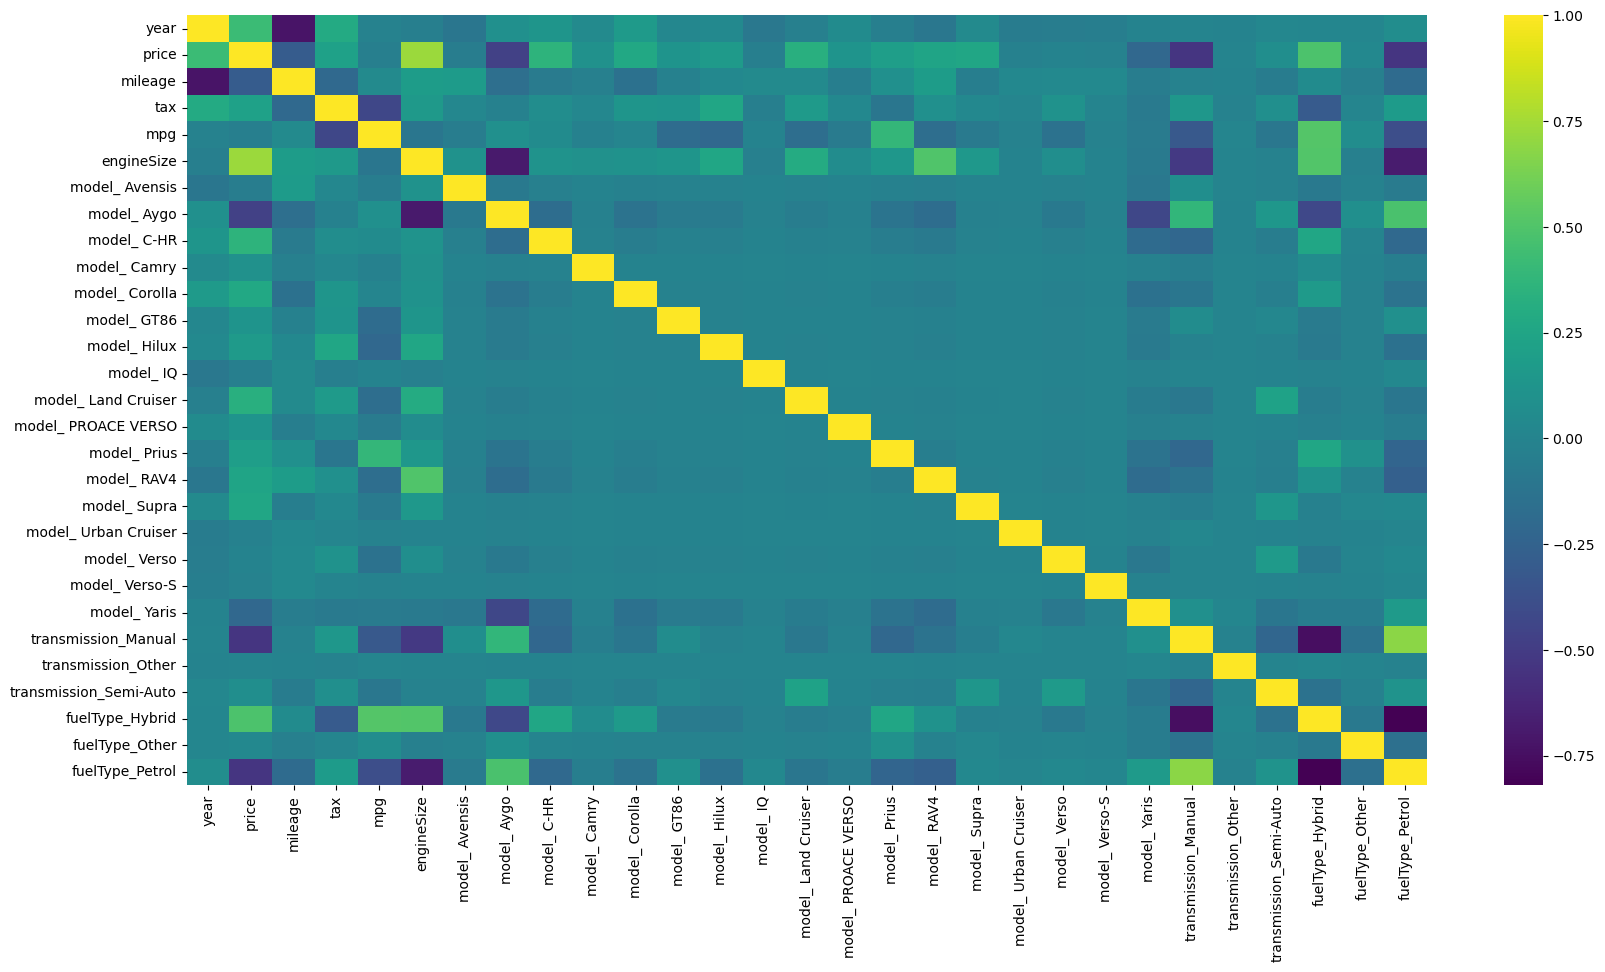

In [ ]:
# heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df_encoded.corr(),cmap='viridis')

In [ ]:
# Importing sklearn library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, classification_report

In [ ]:
# defining feature set(x) and target variable(y)
x = df_encoded.drop('price', axis=1)
y = df_encoded['price']

In [ ]:
# Split the data into 80% training, 10% validation, and 10% test sets
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=45)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=45)

In [ ]:
print("Num of rows in training set after split:","x_train:",x_train.shape[0],"&","y_train:",y_train.shape[0])
print("Num of rows in validation set after split:","x_val:",x_val.shape[0],"&","y_val:",y_val.shape[0])
print("Num of rows in testing set after split:","x_test:",x_test.shape[0],"&","y_test:",y_test.shape[0])

Num of rows in training set after split: x_train: 5359 & y_train: 5359
Num of rows in validation set after split: x_val: 670 & y_val: 670
Num of rows in testing set after split: x_test: 670 & y_test: 670


###     Multiple Linear Regression

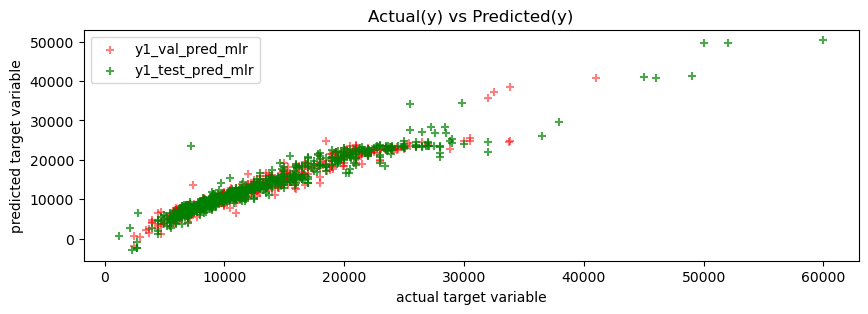

In [ ]:
# Train a linear regression model
model1 = LinearRegression()
model1.fit(x_train, y_train)

# Predict on validation and test sets
y_val_pred_mlr = model1.predict(x_val)
y_test_pred_mlr = model1.predict(x_test)

# Scatter Plot
plt.figure(figsize=(10,3))
plt.scatter(y_val,y_val_pred_mlr,marker='+',color='red',alpha=0.5,label='y1_val_pred_mlr')
plt.scatter(y_test,y_test_pred_mlr,marker='+',color='g',alpha=0.7,label='y1_test_pred_mlr')
plt.xlabel('actual target variable')
plt.ylabel('predicted target variable')
plt.title('Actual(y) vs Predicted(y)')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model on the validation set
mlr_mse_val = mean_squared_error(y_val, y_val_pred_mlr)
mlr_mae_val = mean_absolute_error(y_val, y_val_pred_mlr)
mlr_r2_val = r2_score(y_val, y_val_pred_mlr)
mlr_mse_val, mlr_mae_val, mlr_r2_val

(2022292.506023928, 999.7453993444373, 0.9358307203632626)

In [ ]:
# Evaluate the model on the test set
mlr_mse_test = mean_squared_error(y_test, y_test_pred_mlr)
mlr_mae_test = mean_absolute_error(y_test, y_test_pred_mlr)
mlr_r2_test = r2_score(y_test, y_test_pred_mlr)
mlr_mse_test, mlr_mae_test, mlr_r2_test

(3441348.068907603, 1170.6529276451968, 0.9304723552117273)

Conclusion:

The R^2_score= 0.93 tells us that nearly 93% of the variance in the car price is explained by the predictors in the model, suggesting a strong relationship between the predictors and the car prices.

----

### Decision Tree

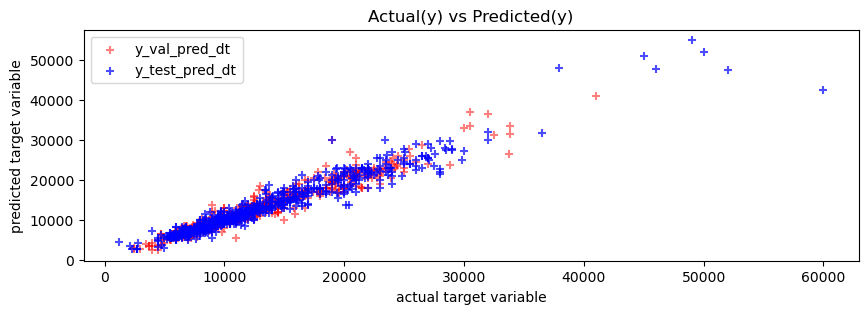

In [ ]:
# Importing lib for Decision Tree
from sklearn.tree import DecisionTreeRegressor

# Training model
model2 = DecisionTreeRegressor()
model2.fit(x_train,y_train)

# Predict on validation and test sets
y_val_pred_dt = model2.predict(x_val)
y_test_pred_dt = model2.predict(x_test)

# Scatter Plot
plt.figure(figsize=(10,3))
plt.scatter(y_val,y_val_pred_dt,marker='+',color='red',alpha=0.5,label='y_val_pred_dt')
plt.scatter(y_test,y_test_pred_dt,marker='+',color='blue',alpha=0.7,label='y_test_pred_dt')
plt.xlabel('actual target variable')
plt.ylabel('predicted target variable')
plt.title('Actual(y) vs Predicted(y)')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model on the validation set
dt_mse_val = mean_squared_error(y_val, y_val_pred_dt)
dt_mae_val = mean_absolute_error(y_val, y_val_pred_dt)
dt_r2_val = r2_score(y_val, y_val_pred_dt)
dt_mse_val,dt_mae_val,dt_r2_val

(2042935.9807835822, 949.2604477611941, 0.9351756831218249)

In [ ]:
# Evaluate the model on the test set
dt_mse_test = mean_squared_error(y_test, y_test_pred_dt)
dt_mae_test = mean_absolute_error(y_test, y_test_pred_dt)
dt_r2_test = r2_score(y_test, y_test_pred_dt)
dt_mse_test, dt_mae_test, dt_r2_test

(3142020.2860074625, 1111.5067164179104, 0.9365198561758912)

Conclusion:

The R^2_score= 0.94 tells us that nearly 92% of the variance in the car price is explained by the predictors in the model, suggesting a strong relationship between the predictors and the car prices.

----

### Random Forest Regression

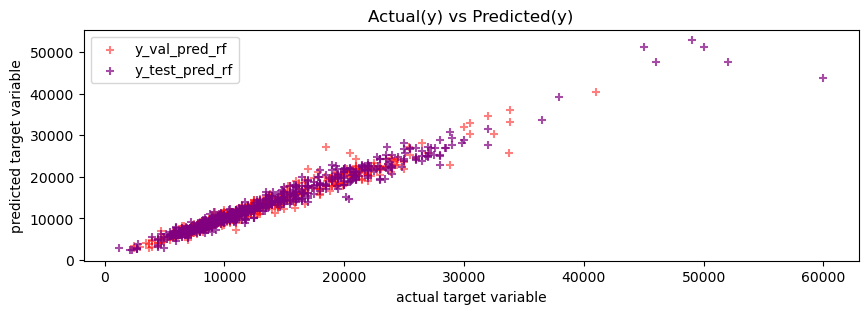

In [ ]:
# Importing lib for Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

# Training model
model3 = RandomForestRegressor()
model3.fit(x_train,y_train)

# Predict on validation and test sets
y_val_pred_rf = model3.predict(x_val)
y_test_pred_rf = model3.predict(x_test)

# Scatter Plot
plt.figure(figsize=(10,3))
plt.scatter(y_val,y_val_pred_rf,marker='+',color='red',alpha=0.5,label='y_val_pred_rf')
plt.scatter(y_test,y_test_pred_rf,marker='+',color='purple',alpha=0.7,label='y_test_pred_rf')
plt.xlabel('actual target variable')
plt.ylabel('predicted target variable')
plt.title('Actual(y) vs Predicted(y)')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model on the validation set
rfr_mse_val = mean_squared_error(y_val, y_val_pred_rf)
rfr_mae_val = mean_absolute_error(y_val, y_val_pred_rf)
rfr_r2_val = r2_score(y_val, y_val_pred_rf)
rfr_mse_val,rfr_mae_val,rfr_r2_val

(1225263.6368504171, 743.0180805614783, 0.9611212103552887)

In [ ]:
# Evaluate the model on the test set
rfr_mse_test = mean_squared_error(y_test, y_test_pred_rf)
rfr_mae_test = mean_absolute_error(y_test, y_test_pred_rf)
rfr_r2_test = r2_score(y_test, y_test_pred_rf)
rfr_mse_test, rfr_mae_test, rfr_r2_test

(1805340.08291956, 862.9403403340439, 0.9635256180154115)

In [ ]:
#print(classification_report(y2_test,y2_test_pred))

Conclusion:

The R^2_score= 0.96 tells us that 96% of the variance in the car price is explained by the predictors in the model, suggesting a strong relationship between the predictors and the car prices. Hence, among all the 3 model, Random Forest is the best one as it has highest model score.

# Final Summary:



- **Multiple Linear Regression**:
  - **R² Score**: 0.93
  - **Interpretation**: Approximately 93% of the variance in car prices is explained by the predictors, indicating a strong relationship between the features and car prices.

- **Decision Tree Regression**:
  - **R² Score**: 0.94
  - **Interpretation**: Around 94% of the variance in car prices is explained by the predictors, suggesting a strong relationship, slightly better than multiple linear regression.

- **Random Forest Regression**:
  - **R² Score**: 0.96
  - **Interpretation**: 96% of the variance in car prices is explained by the predictors, showing the strongest relationship among all the models tested.

- **Overall Conclusion**:
  - **Best Model**: Random Forest, as it achieved the highest R² score (0.96), indicating that it best captures the variance in car prices among the three models applied.